# Tarea
Ejecutar y realizar las actividades que se marcan como ejercicio.

Notar que las instrucciones se realizan para 1 solo archivo de los que puedes encontrar en teams, pero una vez que tu código funcione para 1 archivo deberás intentar generalizarlo para que funcione colectando la información de todos los archivos disponibles.

In [87]:
!pip install scienceplots
!pip install latex

In [88]:
# Importamos las librerias que necesitamos
import numpy as np
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.decomposition import PCA  # Para llamar al método de PCA
import scienceplots
plt.style.use(['science', 'no-latex'])

Los datos de espectros que utilizaremos se procesaron de tal manera que sólo incluyen quasares con corrimiento al rojo mayor a 2.1
Para mayor cantidad de espectros disponibles públicamente que se obtivieron con DESI, consultar:

https://data.desi.lbl.gov/doc/

In [89]:
# Abrimos los datos de un espectro desde drive
drive.mount('/content/drive')
dataset = fits.open("/content/drive/MyDrive/Data/DESI/coadd-sv3-dark-25956.fits")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Desplegamos el contenido del archivo, el cuál está organizado en diferentes HDU (pueden ser de diferentes tipos).

In [90]:
dataset.info()

Filename: /content/drive/MyDrive/Data/DESI/coadd-sv3-dark-25956.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      60   ()      
  1  FIBERMAP      1 BinTableHDU    219   49R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  2  EXP_FIBERMAP    1 BinTableHDU     64   6847R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  3  B_WAVELENGTH    1 ImageHDU        10   (2751,)   float64   
  4  B_FLUX        1 ImageHDU         8   (2751, 49)   float32   
  5  B_IVAR        1 ImageHDU         8   (2751, 49)   float32   
  6  B_MASK        1 ImageHDU        10   (2751, 49)   int32 (rescales to uint32)   
  7  B_RESOLUTION    1 ImageHDU         9   (2751, 11, 49)   float32   
  8  R_WAVELENGTH    1 ImageHDU        10   (2326,)

El HDU de FIBERMAP contiene información sobre el objeto que se observó. Particularmente nos interesaremos en TARGETID, que es el identificador único que se le asigna a cada objeto que se observa en DESI.

In [91]:
fibermap=Table(dataset["FIBERMAP"].data)
fibermap

TARGETID,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX
int64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32
39627776315097634,0,218.52424978650916,-0.5708880487743447,0.0,0.0,2015.5,262148,1,TGT,0.6786714935367465,1,9010,2186m005,328362,546,PSF,0.038301565,2.1088462,2.6753373,3.0280137,6.1234255,8.722145,638.51776,192.55594,83.18806,2.96911,0.6273142,1.6395667,2.079997,2.3541927,1.6395754,2.0800092,2.3542047,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.52424978650916,-0.5708880487743447,7,5968.394,4,4,-0.0035714286,0.0043915506,-0.0028571428,0.005732115,218.5242362522236,0.03474935,-0.570876468972911,0.07156216,0.789
39627770271109740,0,218.44895797439506,-0.719380644742242,0.0,0.0,2015.5,262148,1,TGT,0.8617445200003712,1,9010,2183m007,326921,4716,PSF,0.038511276,1.8675007,2.2263274,1.7445359,4.1686535,5.4304776,1080.8403,643.4569,74.2835,3.3928757,0.7213921,1.4534671,1.7327403,1.3577642,1.4534671,1.7327403,1.3577642,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44895797439506,-0.719380644742242,7,6376.1396,5,5,-0.005,0.0077551827,-0.003,0.0067717903,218.4489392177955,0.07953809,-0.7193684246118572,0.08681177,0.789
39627770271109663,0,218.44489778234856,-0.6503627954768026,0.0,0.0,2015.5,262148,1,TGT,0.6862554823098777,1,9010,2183m007,326921,4639,PSF,0.03767091,0.9389951,1.5217457,2.1123633,4.973551,7.649223,1709.9951,657.91705,129.35243,3.182526,0.6444316,0.73003054,1.1830955,1.6422768,0.7300333,1.1831069,1.6423012,0,0.0,0.0,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103400,4,262148,0,0,0,0,0,0,218.44489778234856,-0.6503627954768026,2,1641.9678,1,1,-0.007,0.007,0.003,0.003,218.4448717597359,0.0,-0.650374501195604,0.0,0.789
39627770271107659,0,218.3599421015996,-0.7847012179461395,0.0,0.0,2015.5,1179714,1,TGT,0.7512892596631447,1,9010,2183m007,326921,2635,REX,0.044287086,0.340597,0.39200372,0.51483154,3.026456,5.6512446,640.03625,299.1042,63.7238,3.2205527,0.67119694,0.2123443,0.24439368,0.32097036,0.21235447,0.24442847,0.32104084,0,1.0,0.33836335,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.3599421015996,-0.7847012179461395,3,2093.9639,1,1,0.001,0.001,-0.004,0.004,218.3599457913388,0.0,-0.7846852779973815,3.996803e-13,0.77981704
39627770271108753,0,218.4061716317348,-0.6684951821184881,0.0,0.0,2015.5,1179714,1,TGT,0.6726693674048274,1,9010,2183m007,326921,3729,REX,0.038801994,1.3429354,1.497762,2.075864,14.70572,18.051325,1067.2585,443.66803,67.02692,2.9109225,0.6239691,0.90932155,1.0141568,1.4055984,0.90932155,1.0141568,1.4055984,0,1.0,0.26051852,0.0,0.0,0,,0.0,0.0,0.0,0.0,S,103100,9,1179714,0,0,0,0,0,0,218.4061716317348,-0.6684951821184881,3,2093.9639,1,1,-0.003,0.003,-0.005,0.005,218.40616018510846,0.0,-0.6684750931668034,3.996803e-13,0.7834136
39627764227118638,0,218.2220149915

Podemos observar que contamos con espectros de 49 quasares.

In [92]:
tids=fibermap["TARGETID"] # Guardamos TARGETID en una variable

Ahora, los espectros observados se guardan en los HDU de B_FLUX, R_FLUX y Z_FLUX; y las longitudes de onda se guardan en los HDUs llamados B_WAVELENGTH,B_WAVELENGTH,Z_WAVELENGTH, respectivamente.

B, R y Z corresponden a diferentes bandas del espectógrafo de DESI.

In [93]:
# Vamos a acceder sólo a los espectros de la banda B, cambiarlos si se desea acceder a otra vanda
bwave = dataset["B_WAVELENGTH"].data
bflux = dataset["B_FLUX"].data

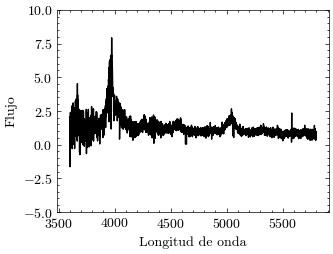

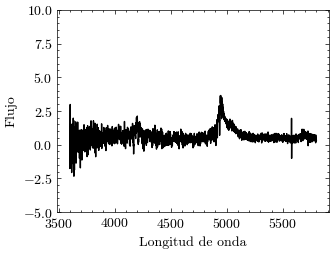

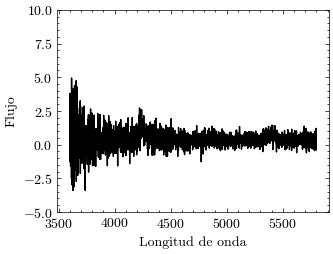

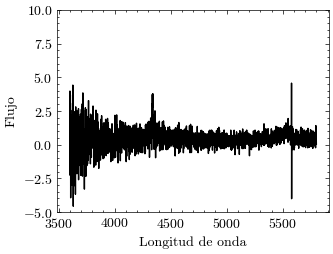

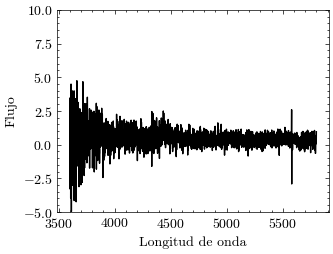

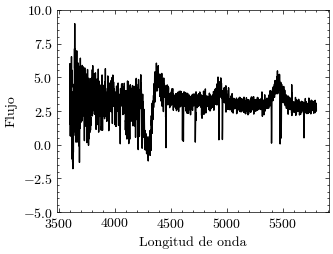

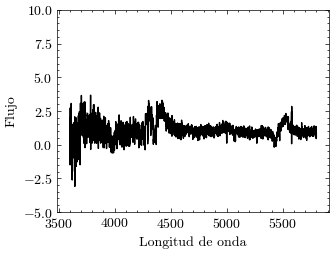

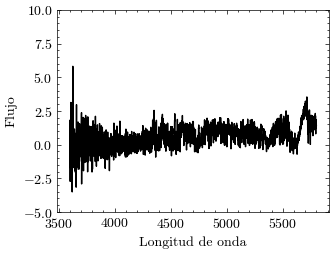

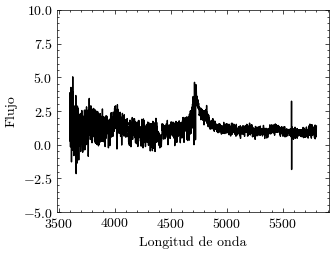

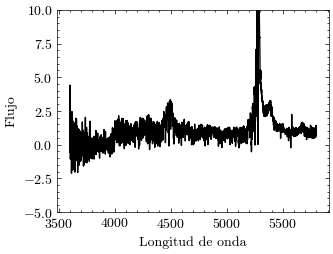

In [94]:
# Graficamos los primeros 10 espectros
for i in range(10):
  plt.plot(longitud, flujo[i],'k')
  plt.ylim(-5,10)
  plt.xlabel('Longitud de onda')
  plt.ylabel('Flujo')
  plt.show()

# **Ejercicio**
**Utiliza el análisis PCA para encontrar los componentes principales que corresponden a los espectros que tenemos. Hazlo primero para el espectro en un sólo archivo, luego combina los datos de diferentes archivos y haz el PCA nuevo.**


PCA para 1 archivo:

In [96]:
pca = PCA()
pca.fit(bflux)
# Calculamos los eigenvalores
evals = pca.explained_variance_ratio_
evals_cs = evals.cumsum()
# Calculamos los eigenvectores
evecs = pca.components_

In [100]:
# Para encontrar los coeficientes de un sólo espectro
flux_m = bflux.mean(0)
flux1 = bflux[0]
coeff = np.dot(evecs, flux1 - flux_m)

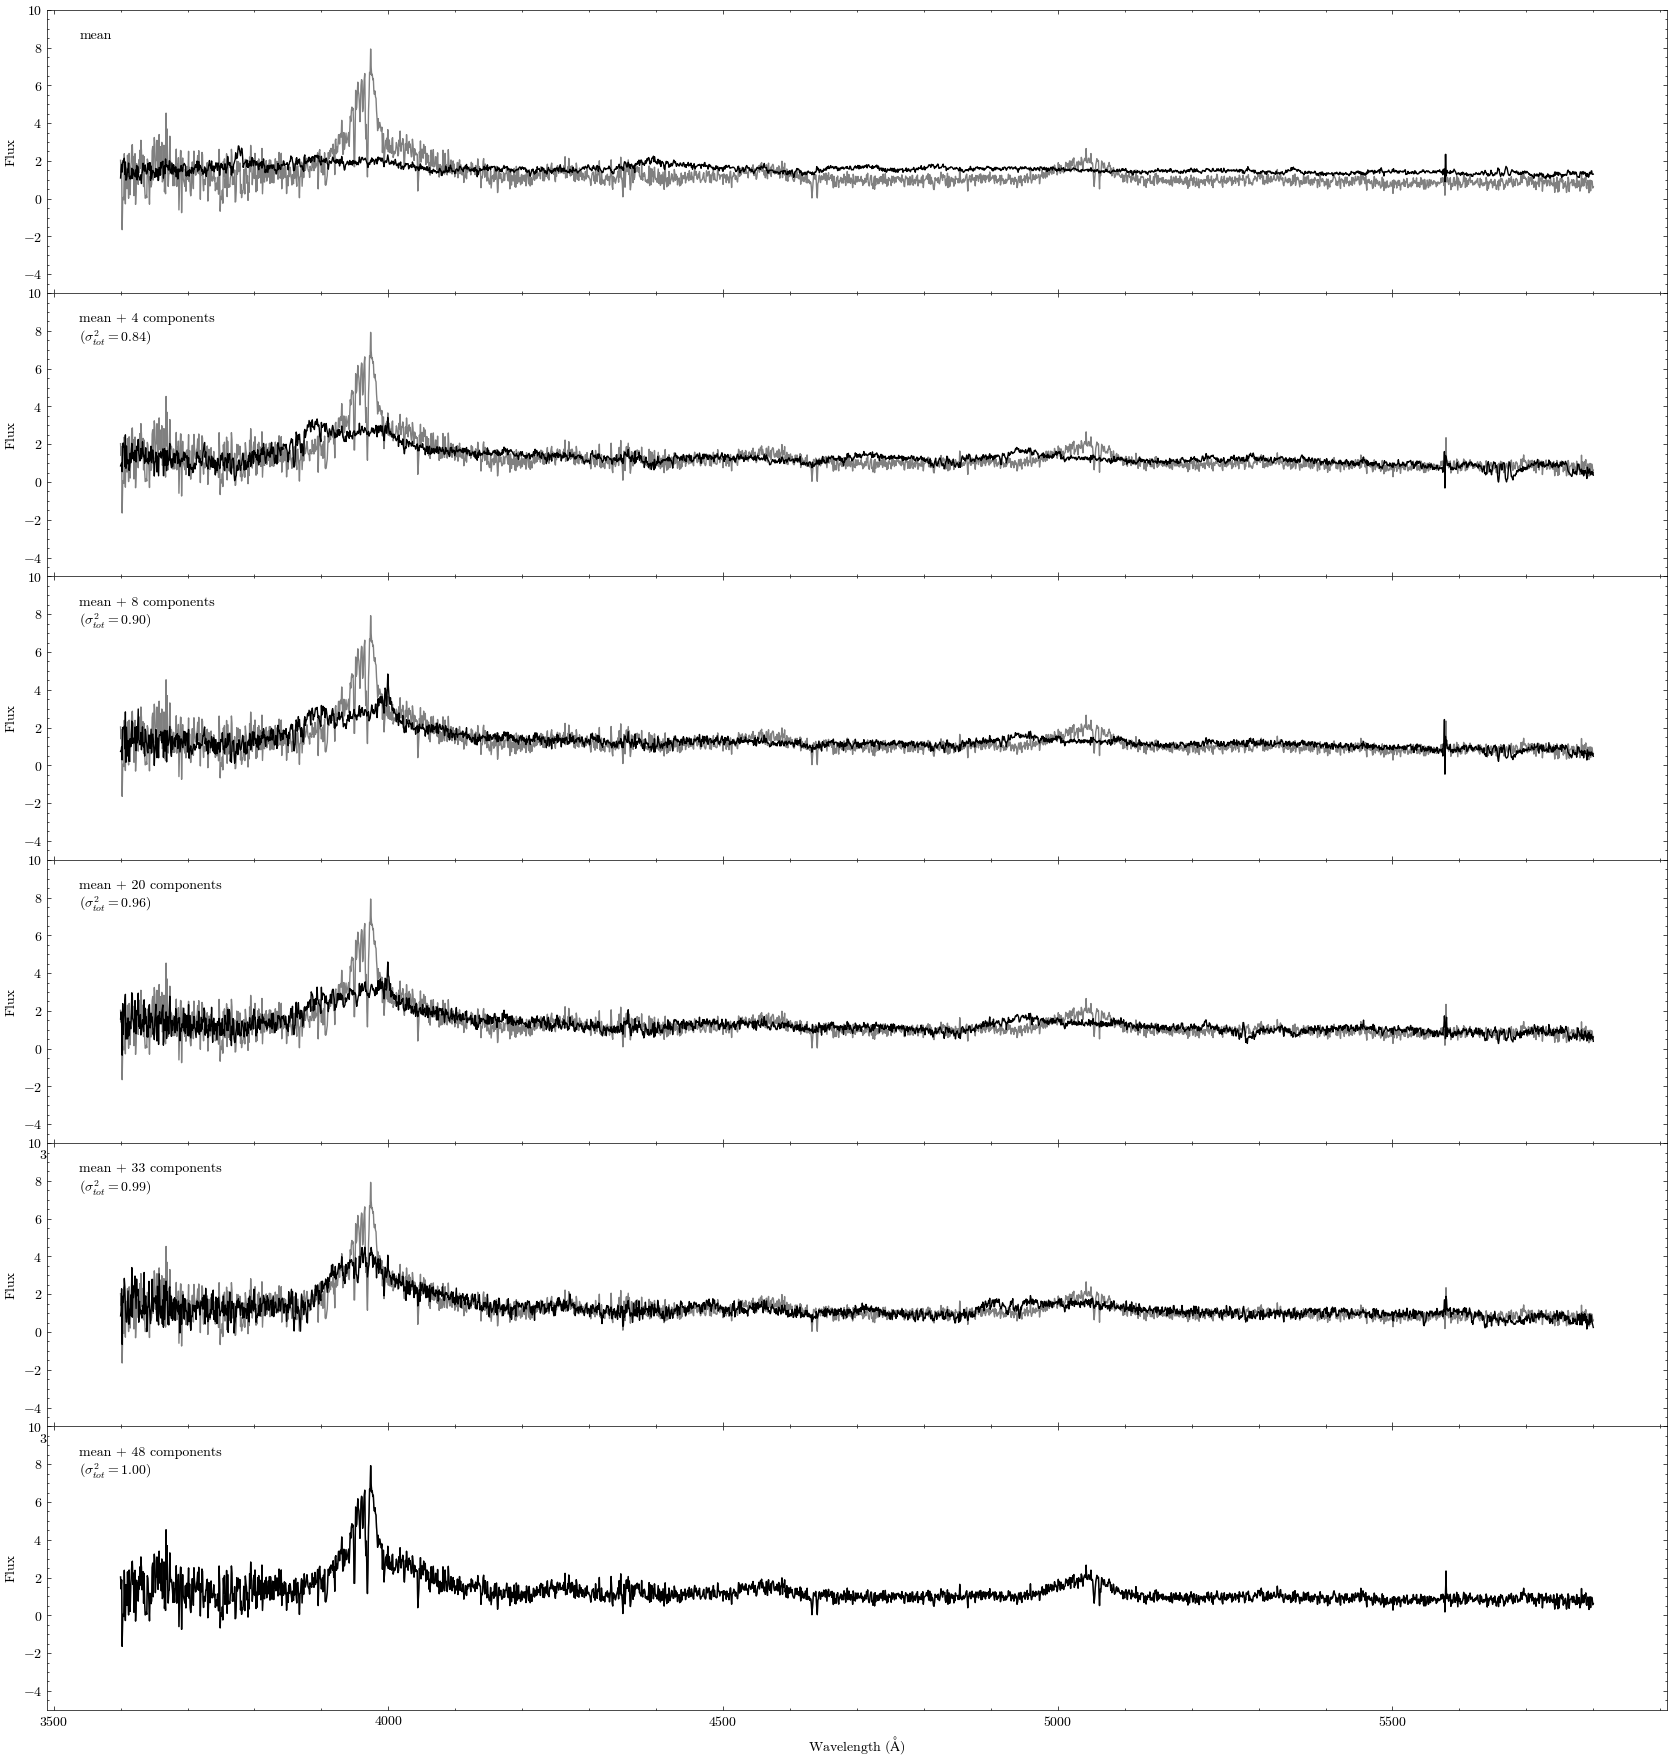

In [102]:
# Ploteamos la secuencia de reconstrucciones
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)  # No debe haber espacio vertical entre los subplots (hspace=0)

for i, n in enumerate([0, 4, 8, 20, 33, 48]):
    ax = fig.add_subplot(611 + i)
    # Si queremos agregar más páneles a la imágen, cambiar el 6 a la cantidad de páneles deseada, y agregar las nuevas cantidades de componentes en el [] del ciclo
    # Si se desean más páneles por fila, cambiar el primer 1

    ax.plot(bwave, flux1, '-', c='gray')
    ax.plot(bwave, flux_m + np.dot(coeff[:n], evecs[:n]), '-k')
    # Traza el espectro reconstruido utilizando los componentes principales calculados previamente. Se utiliza la cantidad de componentes especificada por n.

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-5, 10)  # Aquí podemos cambiar los rangos del eje 'y' de las gráficas
    ax.set_ylabel('Flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel (r'${\rm Wavelength\ (\AA)}$')
plt.show()

Ahora, si hacemos para dos archivos:

In [105]:
# Creamos una función para calcular la longitud de onda de los archivos combinados
def Flux(File):
  dataset = File
  fibermap = Table(dataset["FIBERMAP"].data)
  tids = fibermap["TARGETID"]
  bwave = dataset["B_WAVELENGTH"].data  # Seguiremos con los datos en B
  bflux = dataset["B_FLUX"].data

  return bwave, bflux, tids

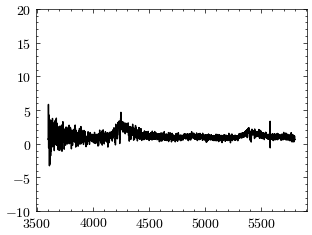

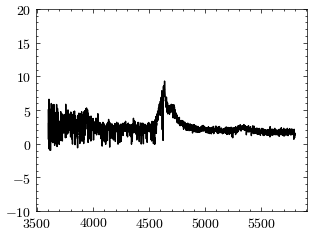

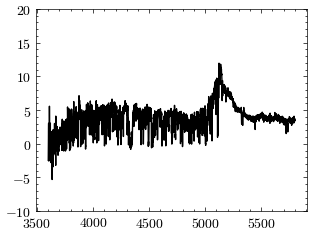

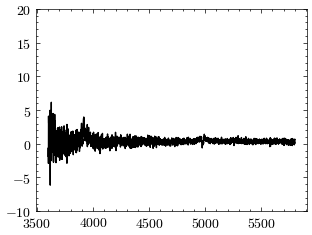

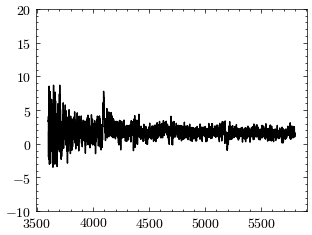

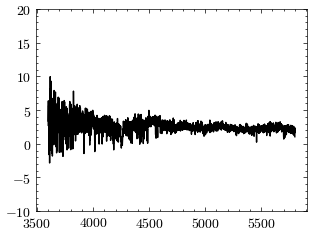

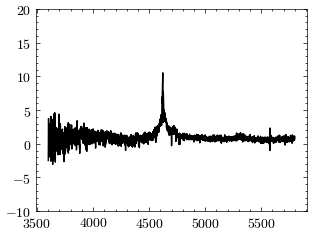

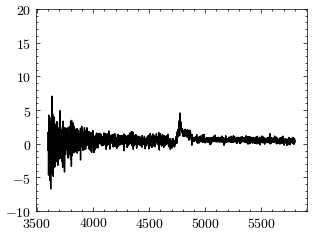

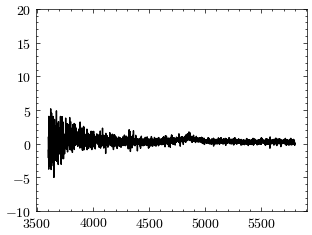

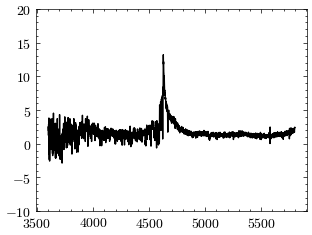

In [107]:
bwave2, bflux2, _ = Flux (fits.open("/content/drive/MyDrive/Data/DESI/coadd-sv3-dark-25965.fits"))
for i in range(10):
  plt.plot(bwave2, bflux2[i],'k')
  plt.ylim(-10, 20)
  plt.show()

In [111]:
# Creamos una función para aplicar el método PCA
def PCA1(bwave,bflux):
  pca = PCA()
  pca.fit(bflux)
  evals = pca.explained_variance_ratio_
  evals_cs = evals.cumsum()
  evecs = pca.components_

  flux_m = bflux.mean(0)
  flux1 = bflux[0]
  coeff = np.dot(evecs, flux1 - flux_m)

  fig = plt.figure(figsize=(10, 20))
  fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

  for i, n in enumerate([0, 4, 8, 20, 35, 48]):
      ax = fig.add_subplot(611 + i)
      ax.plot(bwave, flux1, '-', c='gray')
      ax.plot(bwave, flux_m + np.dot(coeff[:n], evecs[:n]), '-k')

      if i < 3:
          ax.xaxis.set_major_formatter(plt.NullFormatter())

      ax.set_ylim(-7, 15)
      ax.set_ylabel('Flux')

      if n == 0:
          text = "mean"
      elif n == 1:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n]
      else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

      ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

  fig.axes[-1].set_xlabel (r'${\rm Wavelength\ (\AA)}$')
  plt.show()

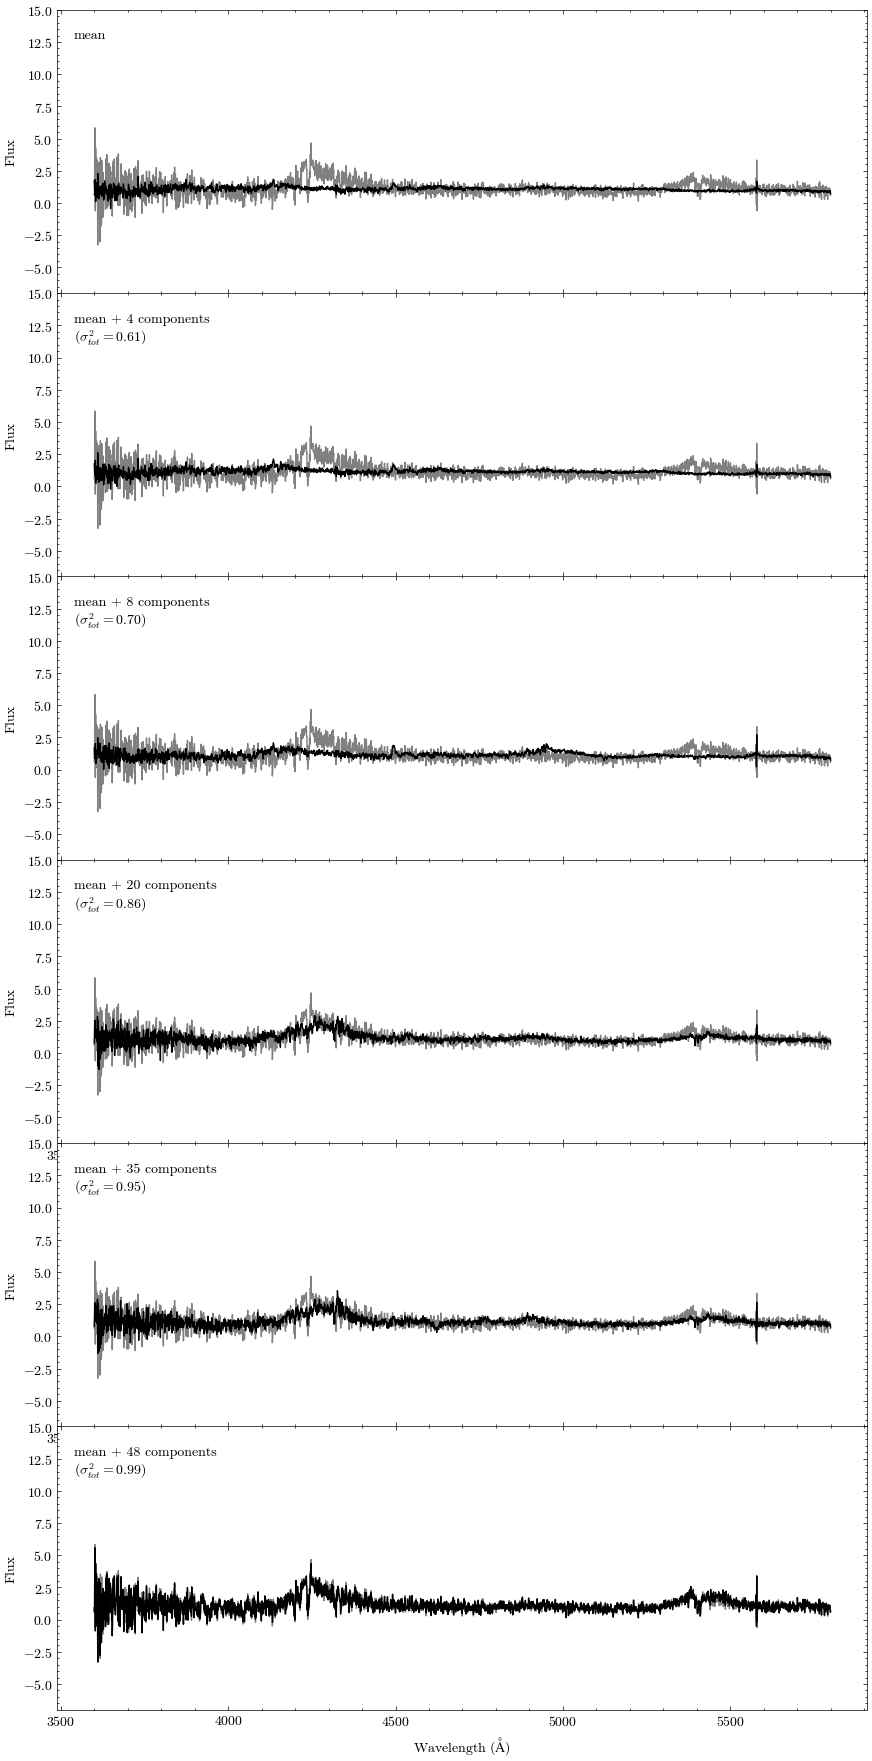

In [112]:
PCA1(bwave2,bflux2)

Lo anterior es una generalización.

Si ahora combinamos todos los archivos que tenemos:

In [115]:
# Primero, debemos tener todos los flujos en un sólo array

# Extraemos los datos de las datasets restantes
bwave1, bflux1, _ = Flux(fits.open("/content/drive/MyDrive/Data/DESI/coadd-sv3-dark-25956.fits"))
bwave3, bflux3, _ = Flux(fits.open("/content/drive/MyDrive/Data/DESI/coadd-sv3-dark-9930.fits"))
bwave4, bflux4, _ = Flux(fits.open("/content/drive/MyDrive/Data/DESI/coadd-sv3-dark-25971.fits"))

In [116]:
# Ahora, concatenamos los flujos
flujos = np.concatenate((bflux1, bflux2, bflux3, bflux4), axis=0)

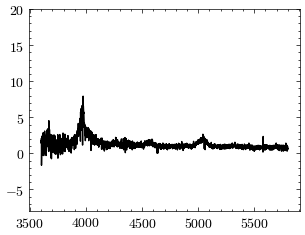

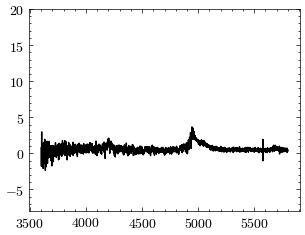

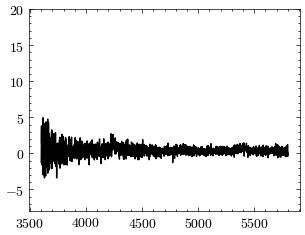

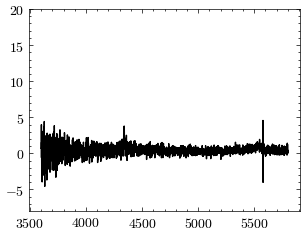

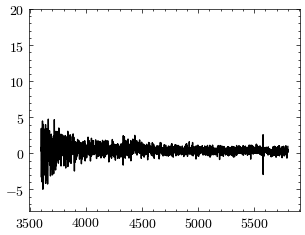

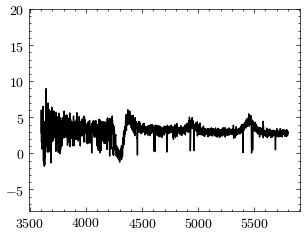

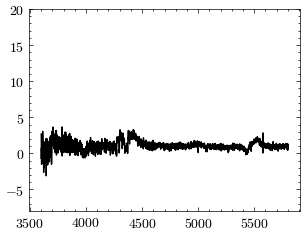

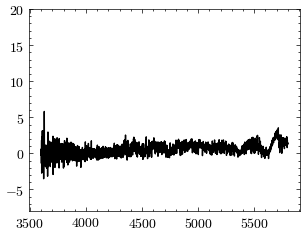

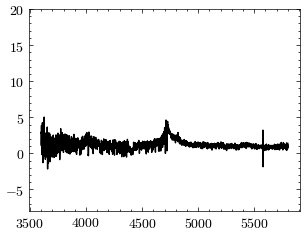

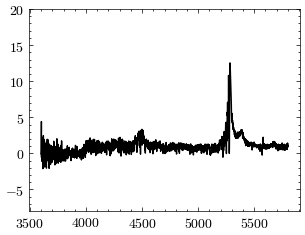

In [119]:
# Finalmente, los graficamos
for i in range(10):
  plt.plot(bwave2, flujos[i],'k')
  plt.ylim(-8, 20)
  plt.show()

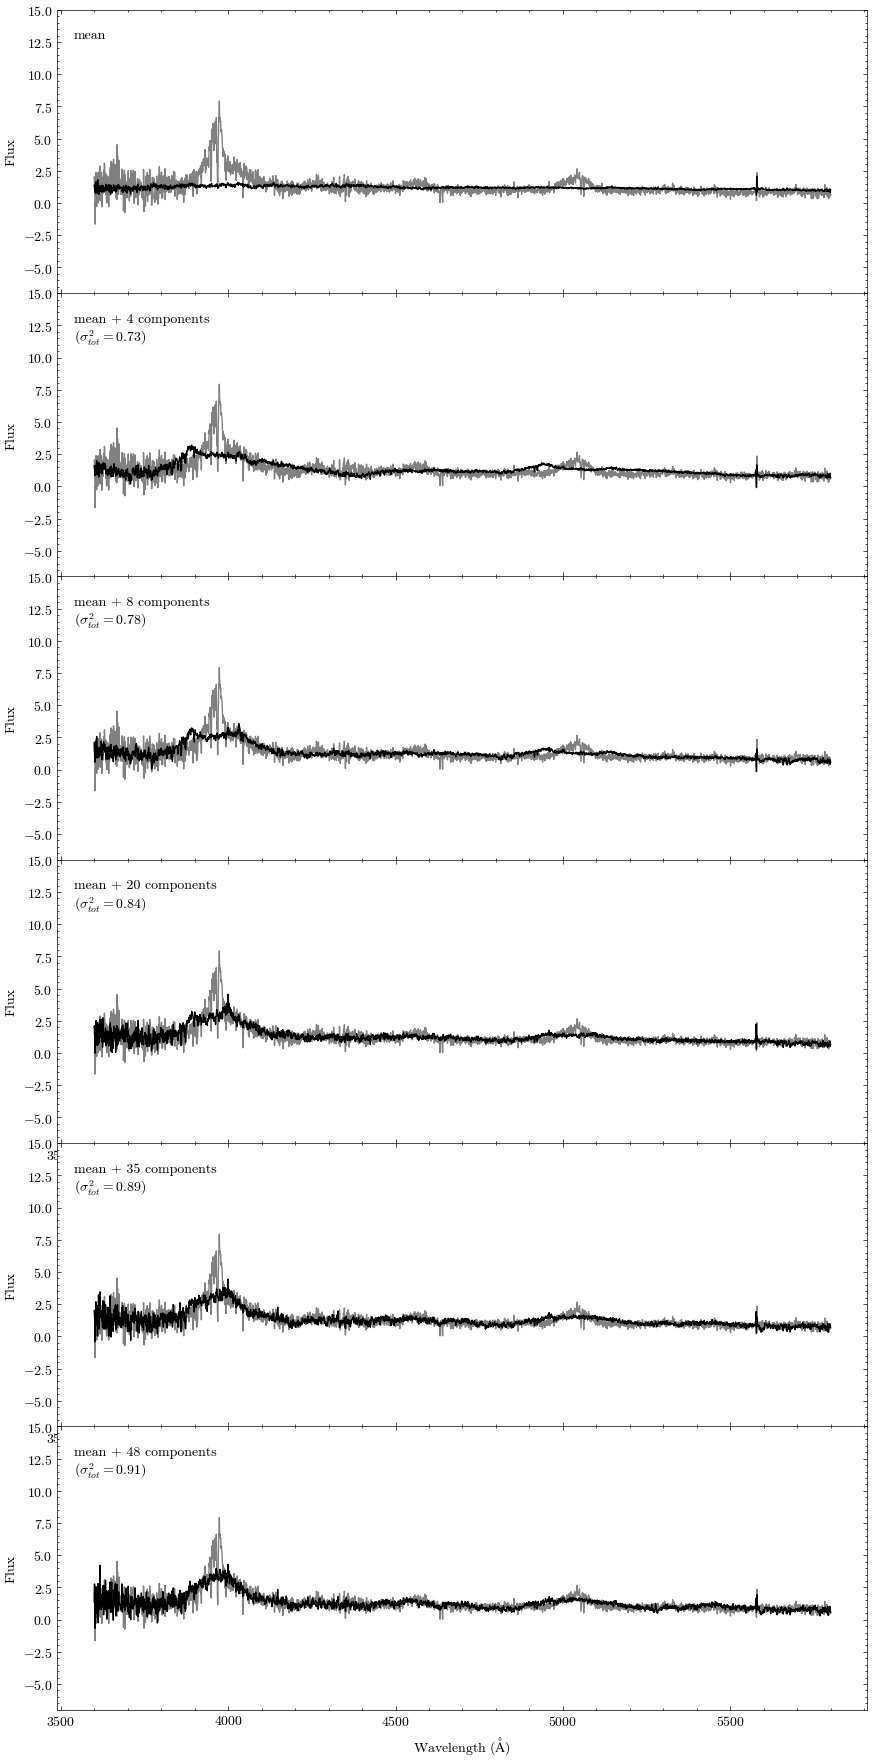

In [120]:
PCA1(bwave, flujos)

En principio todos estos espectros corresponden al espectro de quasares con corrimiento al rojo mayor a 1.8, sin embargo necesitamos leer otra tabla para saber el corrimiento al rojo que midió DESI para cada objeto.

In [122]:
# Vamos a medir el corrimiento al rojo directamente como una tabla
zcat=Table.read("/content/drive/MyDrive/Data/DESI/zall-pix-edr-vac.fits",hdu=1)
# Mostramos el catálogo de corrimiento al rojo
zcat

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY,MIN_MJD,MEAN_MJD,MAX_MJD,FIRSTNIGHT,LASTNIGHT
int64,bytes7,bytes6,int32,int32,float64,float64,int64,float64,float64[10],int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,bytes8,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool,float64,float64,float64,int32,int32
39628473198708395,cmx,other,2154,2154,-0.0019956912923479522,4.1311493573349107e-48,1570,8.999999999999996e+99,0.0 .. 0.0,0,STAR,CV,3,1.942668892225729e+84,512,23.661967677367254,29.84758879289675,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.3743222091683128,7,9010,--,494512,1707,DEV,0.056008916,0.8742358,4.4879527,14.53286,40.183647,23.470558,846.09424,161.24467,27.071745,-1.0,-1.0,0.30432662,1.5622828,5.0589743,0.30432662,1.5622828,5.0589743,0,4.0,1.4857041,-0.47312373,0.34610084,0,--,0.0,0.0,0.0,0.0,S,3200,1,9007199254742016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.661967677367254,29.84758879289675,0,0.0,0,0,0.0,0.0,0.0,0.0,23.6619676773673,0.0,29.8475887928968,0.0,0.7702122,334.5758,0.23833227,63.154266,251.84634,1200.8414,489.7509,6.6365247,1.7938427,29931.836,67.48044,5253.2964,0.107736714,5998.398,33749.49,20.86845,95.85028,4.4280867e-05,226.88919,8.178434e-06,0.0,9751.99,5.995135e-05,48.05161,102.743744,30266.412,294.60797,5316.4507,251.95409,16951.23,34239.24,75.55658,200.38788,0,False,1,True,59200.06640136,59200.095110124996,59200.12381137,20201216,20201216
39628473198709499,cmx,other,2154,2154,0.797663336968385,6.764807540963103e-05,0,8562.711500316858,173.84545793773444 .. 3.5471443000513863,7928,GALAXY,--,10,1111.0357974395156,0,23.711764237454403,29.843726508418328,0.0,0.0,2020.9597,9007199254742016,1,TGT,0.6556303597015493,7,9010,--,494512,2811,DEV,0.055015083,0.37260255,2.0997107,11.454535,42

De la tabla anterior, los datos más importantes son TARGETID, SURVEY, SPECTYPE y el corrimiento al rojo Z.

In [123]:
# Reducimos la tabla solamente a estas variables
zcat=zcat['TARGETID','SURVEY','SPECTYPE','Z']
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39628473198708395,cmx,STAR,-0.0019956912923479522
39628473198709499,cmx,GALAXY,0.797663336968385
39628473198710139,cmx,GALAXY,1.33150513847107
39628473198710603,cmx,GALAXY,0.804205874112604
39628473198711006,cmx,STAR,-6.607473910190775e-05
39628473198711342,cmx,STAR,-0.0019956912923479522
39628473198711925,cmx,GALAXY,0.39072440164450306
39628473202901028,cmx,GALAXY,0.6657999257489294
39628473202901626,cmx,GALAXY,0.32842015807005115


Ahora, vamos a reducir la tabla solamente a los elementos TARGETIDs cuyos espectros estén presentes en el archivo de espectros (dataset).

Para ello, necesitamos saber que los datos corresponden a SURVEY = sv3 (como indica el nombre de la fila).

In [124]:
# Filtramos los datos para sv3
mask=zcat["SURVEY"]=='sv3'
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
616088497761027054,sv3,GALAXY,0.8047145429076951
616088497765221242,sv3,STAR,-0.0019956912923479522
616088497765221281,sv3,GALAXY,0.5507557262875663
616088497765221450,sv3,GALAXY,0.07358486749516376
616088497765221501,sv3,GALAXY,0.719444701817346
616088497769415698,sv3,GALAXY,0.039215908005138314
616088497773610181,sv3,GALAXY,0.2864062436603106
616088497819747217,sv3,GALAXY,0.4960341488452893
616088497819747383,sv3,GALAXY,1.0968576187793935


In [128]:
# Nos quedamos solamente con los elementos que correspondan a los TARGETIDs que existen en el archivo de espectros
mask=np.in1d(zcat["TARGETID"],tids)
zcat=zcat[mask]
zcat

TARGETID,SURVEY,SPECTYPE,Z
int64,bytes7,bytes6,float64
39627764218727224,sv3,QSO,2.1370347911252843
39627764222919195,sv3,QSO,2.5460148518383536
39627764222919677,sv3,QSO,2.5116209374418137
39627764222921791,sv3,QSO,2.1421198094951523
39627764222924517,sv3,QSO,2.2851727866116023
39627764227118438,sv3,QSO,3.630129643577127
39627764227118638,sv3,QSO,2.540430344832981
39627770258523079,sv3,QSO,1.5479191017583473
39627770258526411,sv3,QSO,2.470417839489763


Como podemos observar, ahora tenemos una tabla con 49 elementos, y la mayoria de los espectros son de tipo QSO.

Ahora sabemos, para un TARGETID dado, cuál es corrimiento al rojo del quasar. Veremos si es congruente graficando la posicion de emisión Lyman-alpha para los primeros 10 elementos.

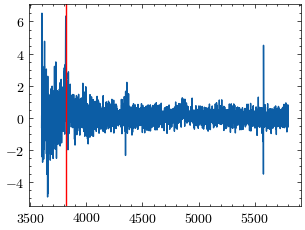

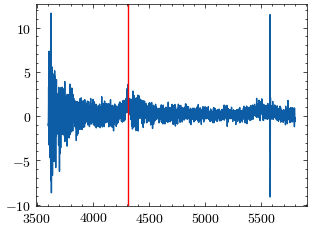

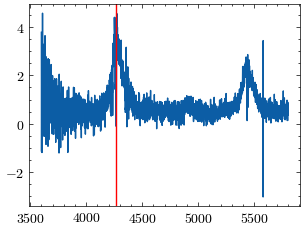

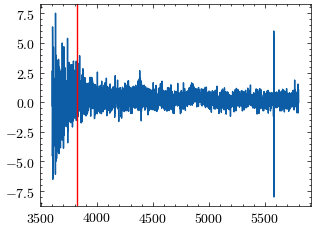

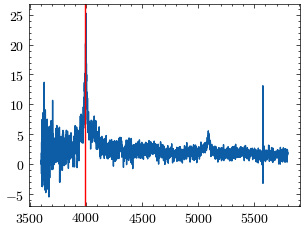

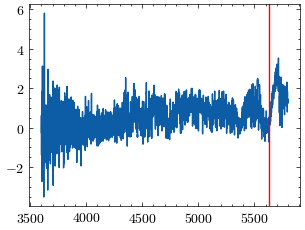

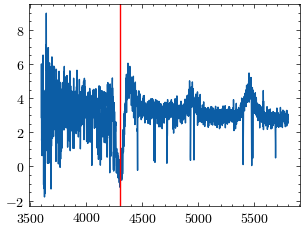

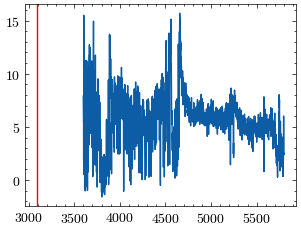

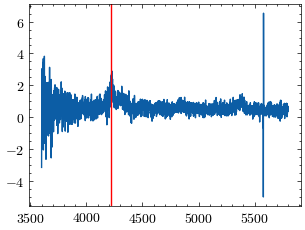

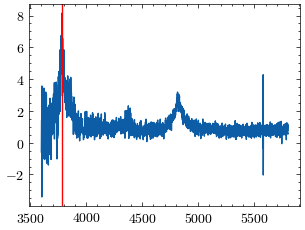

In [129]:
lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(longitud, flujo[indx])
  plt.axvline(1216*(1+z),color='r')
  plt.show()

Podemos ver que la posición de la línea roja en la mayoría de los casos, la cuál es la posición esperada de la línea de emisión Lya, coincide con la posición de una fuerte emisión en los datos. Así que sabemos con certeza que estamos eligiendo correctamente los espectros con los quasares con corrimiento al rojo.

Ahora podemos convertir los espectros de "observed frame" a "restframe". Para ello debemos convertir el arreglo de longitud de onda  de cada espectro al "observed frame" usando corrimiento al rojo.

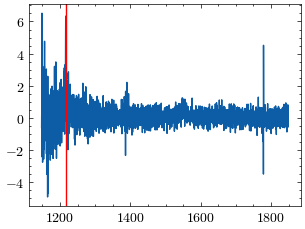

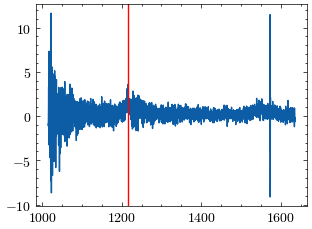

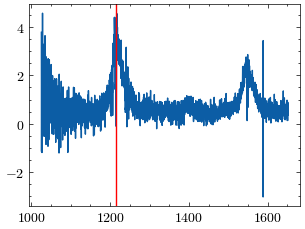

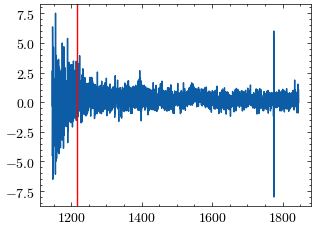

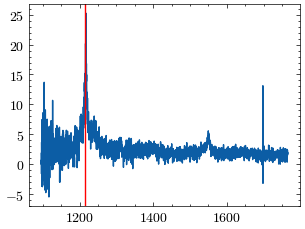

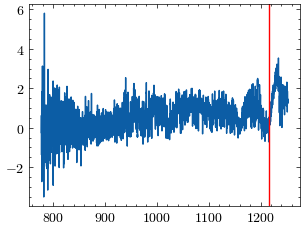

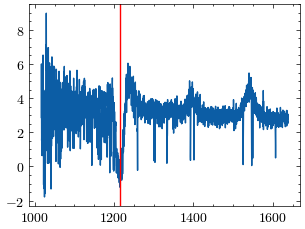

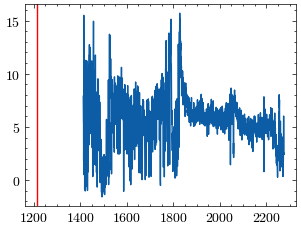

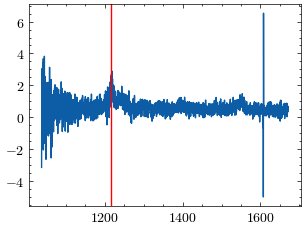

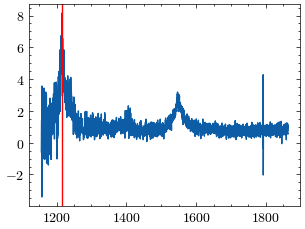

In [130]:
# Para los 10 primeros espectros
lya=1216

for i,tid in enumerate(zcat["TARGETID"][:10]):
  z=zcat["Z"][i]
  indx=np.where(tids==tid)[0][0]
  plt.plot(longitud / (1 + z), flujo[indx])
  plt.axvline(1216,color='red')
  plt.show()

# **Ejercicio**
Ahora que convertimos los espectros, crear un arreglo de longitud de onda en "rest frame" que sea común para todos los espectros, e interpolar los espectros en ese arreglo. Así, todos los espectros tendrán el mismo arreglo de longitud de onda y  podrás aplicar el análisis PCA.

In [ ]:
# No entiendo qué es lo que se tiene qué hacer en esta parte